IT5437 Assignment 1 
 1. Implement the intensity transformation depicted in Fig. 1a on the image shown in Fig. 1b

256


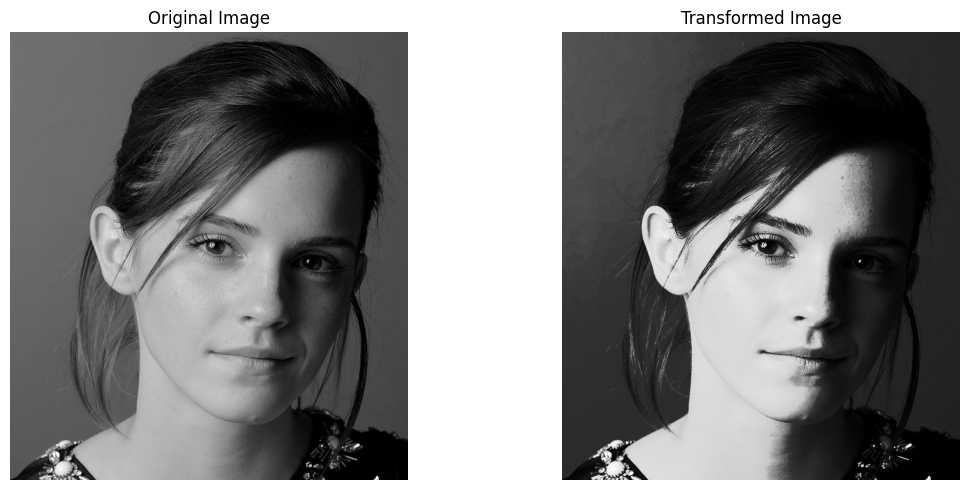

In [7]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

c = np.array([(100,50),(150,200)])

t1 = np.linspace(0,c[0,1],c[0,0]+1 -0).astype(np.uint8)
t2 = np.linspace(c[0,1]+1,c[1,1],c[1,0]-c[0,0]).astype(np.uint8)
t3 = np.linspace(c[1,1]+1,255,255-c[1,0]).astype(np.uint8)

trasform = np.concatenate((t1,t2),axis=0).astype(np.uint8)
trasform = np.concatenate((trasform,t3),axis=0).astype(np.uint8)
print(len(trasform))

img_orig = cv.imread('../CV Assingment/a1images/a1images/emma.jpg',cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_orig,trasform)

# Display the images
plt.figure(figsize=(12, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img_orig, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Transformed image
plt.subplot(1, 2, 2)
plt.imshow(image_transformed, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.tight_layout()
plt.show()


2. Apply a similar operation as above (question 1) to accentuate
    (a) white matter
    (b) gray matter
    in the brain proton density image shown in Fig. 2. Show the intensity transformations as a plots.

256


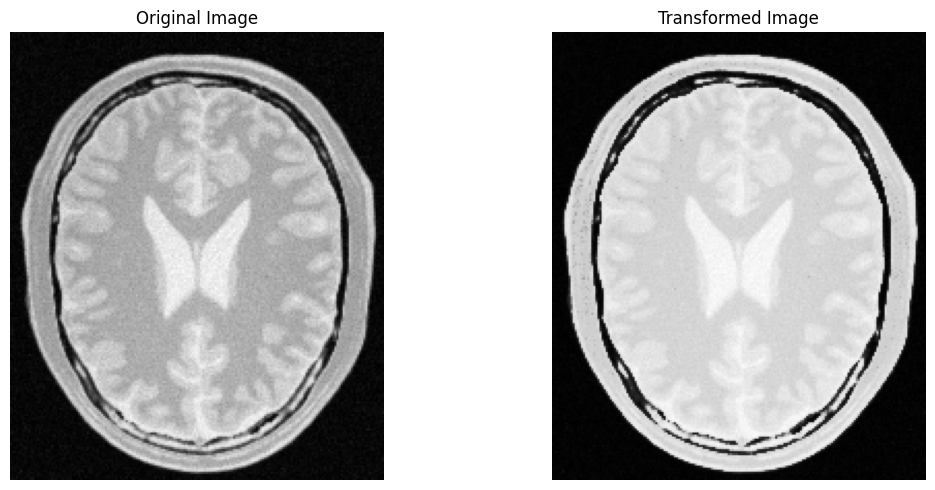

In [8]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

c = np.array([(100,50),(150,200)])

t1 = np.linspace(0,c[0,1],c[0,0]+1 -0).astype(np.uint8)
t2 = np.linspace(c[0,1]+1,c[1,1],c[1,0]-c[0,0]).astype(np.uint8)
t3 = np.linspace(c[1,1]+1,255,255-c[1,0]).astype(np.uint8)

trasform = np.concatenate((t1,t2),axis=0).astype(np.uint8)
trasform = np.concatenate((trasform,t3),axis=0).astype(np.uint8)
print(len(trasform))

img_orig = cv.imread('../CV Assingment/a1images/a1images/brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_orig,trasform)

# Display the images
plt.figure(figsize=(12, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img_orig, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Transformed image
plt.subplot(1, 2, 2)
plt.imshow(image_transformed, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.tight_layout()
plt.show()


3. Consider the image shown in Fig. 31.

  (a) Apply gamma correction to the L plane in the L∗a∗b∗ color space and state the γ value.
  (b) Show the histograms of the original and corrected images.

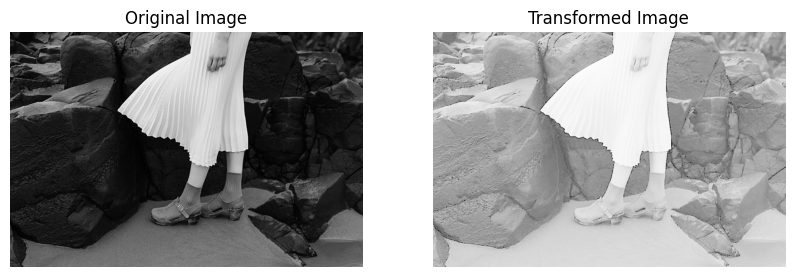

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# --- Load image ---
f = cv.imread('../CV Assingment/a1images/a1images/highlights_and_shadows.jpg', cv.IMREAD_GRAYSCALE)
assert f is not None

# --- Gamma correction ---
gamma = 0.2
t = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype(np.uint8)

# Apply transformation
g = t[f]

# --- Plot results ---
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')

ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')

for a in ax.ravel():
    a.axis('off')

plt.show()


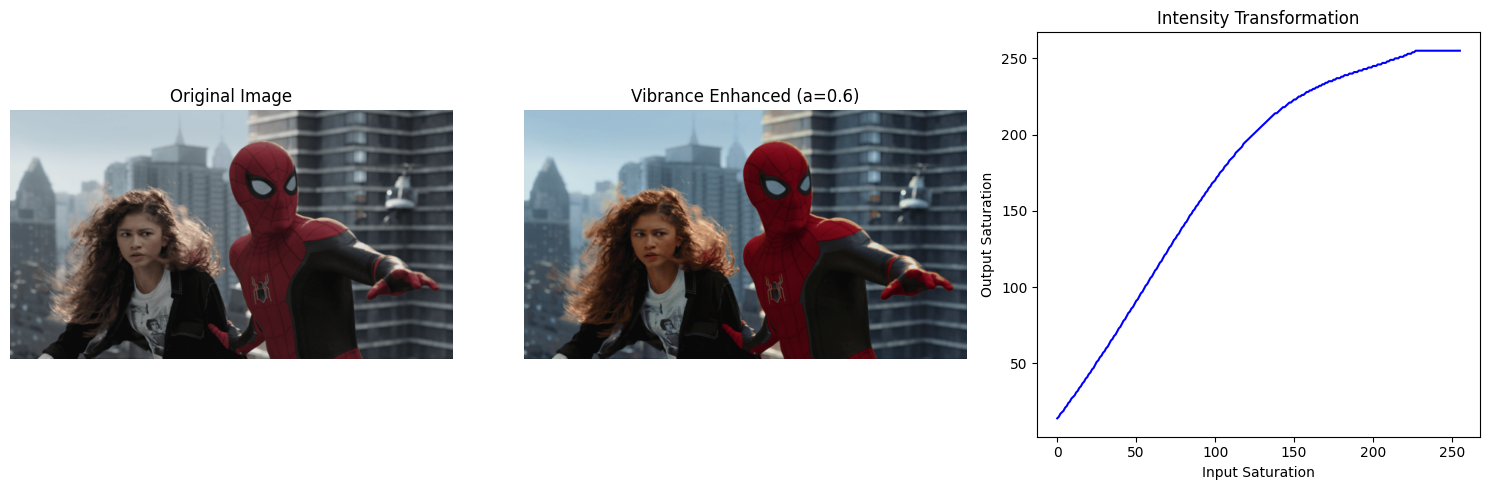

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# --- Load image ---
img = cv.imread("../CV Assingment/a1images/a1images/spider.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # for matplotlib

# --- Convert to HSV ---
hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
H, S, V = cv.split(hsv)

# --- Define vibrance transformation ---
a = 0.6      # adjust until visually pleasing (between 0 and 1)
sigma = 70.0
x = np.arange(256, dtype=np.float32)
bump = a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2))
lut = np.minimum(x + bump, 255).astype(np.uint8)

# --- Apply to saturation plane ---
S_new = cv.LUT(S, lut)

# --- Recombine and convert back to RGB ---
hsv_new = cv.merge([H, S_new, V])
out = cv.cvtColor(hsv_new, cv.COLOR_HSV2RGB)

# --- Display results ---
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(out)
ax[1].set_title(f"Vibrance Enhanced (a={a})")
ax[1].axis("off")

ax[2].plot(x, lut, 'b')
ax[2].set_title("Intensity Transformation")
ax[2].set_xlabel("Input Saturation")
ax[2].set_ylabel("Output Saturation")

plt.tight_layout()
plt.show()
